## TASK 2: MOVIE RATING PREDICTION WITH PYTHON
##### Author: Sharjeel
##### Domain: Data Science
##### Batch: DECEMBER BATCH A92

### Problem Statement 
Build a model that predicts the rating of a movie based on
features like genre, director, and actors. You can use regression
techniques to tackle this problem.


### Aim
The goal is to analyze historical movie data and develop a model
that accurately estimates the rating given to a movie by users or
critics.


### Approach
we will read the dataset and preprocess by handling missing values and encoding categorical variables appropriately. Feature engineering will be performed to enhance the model's performance, including creating new features and removing irrelevant ones. The dataset will then be split into training and testing sets, and Linear Regression model will be trained. Finally, the model's accuracy will be evaluated using metrics like MSE, MAPE or R_Square.


### Content
The columns are resembling practical world features. The Rating column indicates ratings are likely scaled between 1 and 10, with higher ratings indicating better reviews or preferences. In the Rating column we have ratings and the frequency of the ratings. Data contains 15509 records and 10 distinct features.



### Features
Input/Features
1. Name
2. Year
3. Duration
4. Genre
5. Votes
6. Director
7. Actor 1
8. Actor 2
9. Actor 3

Output/Labels

10. Rating


### Procedure
1. Importing and checking the dataset
   
2. EDA
   
3. Observations
   
4. Data Cleaning
   
5. Converting Datatype
    
6. Feature Engineering
    
7. Model Building
    
8. Evaluation
    
9. Conclusion








### Importing and checking the dataset

In [4]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
df=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\CodSoft\CodSoft-Datasets\IMDb Movies India.csv",encoding="latin1")

In [8]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [9]:
df.shape

(15509, 10)

In [10]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [12]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [13]:
df.describe(include="all")

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [14]:
df.isnull().sum()[df.isnull().sum()>0]

Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [15]:
df.duplicated().sum()

6

### Observations

1. Data contains 15509 rows and 10 features.
2. Data contains missing values.
3. Lowest rating given is 1.1.
4. Highest rating given is 10.
5. Average rating given is 5.84 we can say 5 or 6.
6. Name contains movie titles
7. Year has numeric data but object type and also has round brackets
8. Duration has numeric data but object type and also has "min"
9. Genre contains distinct movie categories
10. Votes Indicates the number of people who voted or reviewed the movie.
11. Director column refers to the director who directed the movie
12. Actor columns contains actor names

### Data Cleaning

In [19]:
df=df.drop(["Name"],axis=1)

In [20]:
df.dropna(inplace=True)

In [21]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [22]:
df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [23]:
df.reset_index(drop=True,inplace=True)

In [24]:
df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
3,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
4,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [25]:
df.shape

(5659, 9)

### Converting Datatype

In [44]:
df["Year"]=df["Year"].str.replace(r"\(|\)", "",regex=True).astype(int)
df["Duration"]=pd.to_numeric(df["Duration"].str.replace(" min", ""))
df["Votes"]=pd.to_numeric(df["Votes"].str.replace(",", ""))

1. Year is now an integer column without parentheses.
2. Duration is now a numeric column with only the duration in minutes.
3. Votes is now a numeric column without commas.

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5659 entries, 0 to 5658
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      5659 non-null   int32  
 1   Duration  5659 non-null   int64  
 2   Genre     5659 non-null   object 
 3   Rating    5659 non-null   float64
 4   Votes     5659 non-null   int64  
 5   Director  5659 non-null   object 
 6   Actor 1   5659 non-null   object 
 7   Actor 2   5659 non-null   object 
 8   Actor 3   5659 non-null   object 
dtypes: float64(1), int32(1), int64(2), object(5)
memory usage: 375.9+ KB


### EDA

In [50]:
df.describe(include="all")

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,5659.000000,5659.000000,5659,5659.000000,5659.000000,5659,5659,5659,5659
unique,NaN,NaN,376,NaN,NaN,2431,1960,2321,2556
top,NaN,NaN,Drama,NaN,NaN,David Dhawan,Amitabh Bachchan,Rekha,Pran
freq,NaN,NaN,844,NaN,NaN,41,104,52,57
mean,1996.247570,133.439124,NaN,5.898533,2697.649585,NaN,NaN,NaN,NaN
std,19.741839,25.319939,NaN,1.381165,13651.503584,NaN,NaN,NaN,NaN
min,1931.000000,21.000000,NaN,1.100000,5.000000,NaN,NaN,NaN,NaN
25%,1983.000000,119.000000,NaN,5.000000,30.000000,NaN,NaN,NaN,NaN
50%,2002.000000,135.000000,NaN,6.100000,131.000000,NaN,NaN,NaN,NaN
75%,2013.000000,150.000000,NaN,6.900000,922.500000,NaN,NaN,NaN,NaN


##### Distribution of numeric features

<Figure size 300x300 with 0 Axes>

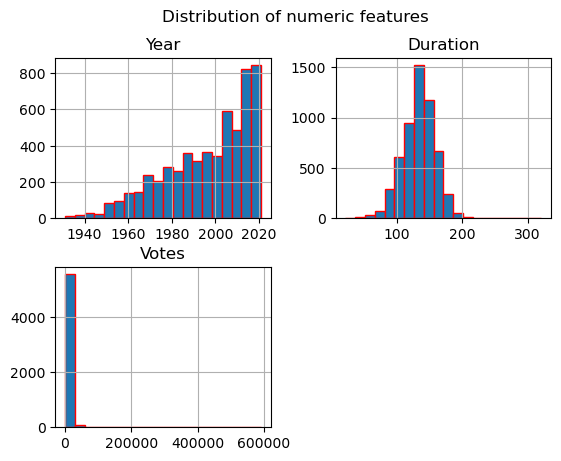

In [53]:
plt.figure(figsize=(3,3))
df[["Year","Duration","Votes"]].hist(bins=20, edgecolor="red")
plt.suptitle("Distribution of numeric features")
plt.show()

##### Univariate Analysis

Average rating is around 5 to 6 & Distribution is gaussian.

In [57]:
# df.Rating.value_counts()
# df.Votes.value_counts()
# df.Duration.value_counts()

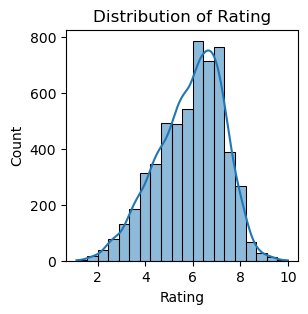

In [59]:
plt.figure(figsize=(3,3))
sns.histplot(x="Rating",bins=20,data=df,kde=True)
plt.title("Distribution of Rating")
plt.show()

Checking top 10 Directors

Jayant Desai, Kanti Shah & Babubhai Mistry directed highest count of movies

In [62]:
direc_counts=df.Director.value_counts().head(10)
direc_counts

Director
David Dhawan            41
Mahesh Bhatt            39
Ram Gopal Varma         33
Hrishikesh Mukherjee    33
Shakti Samanta          33
Vikram Bhatt            30
Priyadarshan            29
Basu Chatterjee         23
Rama Rao Tatineni       23
Shyam Benegal           22
Name: count, dtype: int64

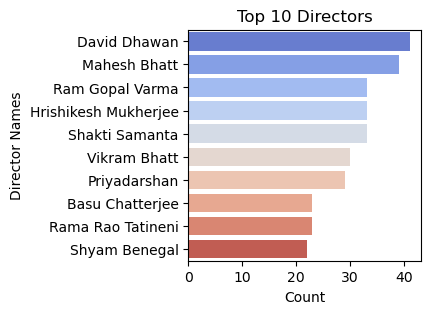

In [66]:
plt.figure(figsize=(3,3))
sns.barplot(x=direc_counts.values,y=direc_counts.index,palette="coolwarm")
plt.title("Top 10 Directors")
plt.xlabel("Count")
plt.ylabel("Director Names")
plt.show()

##### Categorical Features

Checking top 10 Genre

Drama, Action & Thriller are the most popular genre

In [71]:
genre_counts=df.Genre.value_counts().head(10)
genre_counts

Genre
Drama                     844
Drama, Romance            332
Action, Crime, Drama      329
Action, Drama             206
Comedy, Drama             205
Comedy, Drama, Romance    188
Comedy                    187
Action                    170
Drama, Family             160
Romance                   126
Name: count, dtype: int64

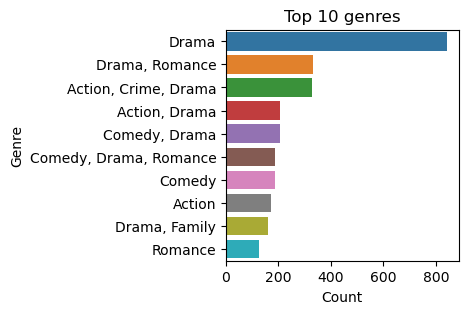

In [78]:
plt.figure(figsize=(3,3))
sns.barplot(x=genre_counts.values,y=genre_counts.index,palette="tab10")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.title("Top 10 genres")
plt.show()

Now Checking top 10 actors

In [85]:
merge_actors=pd.concat([df["Actor 1"],df["Actor 2"],df["Actor 3"]])

In [87]:
actor_counts=merge_actors.value_counts().head(10)
actor_counts

Mithun Chakraborty    160
Amitabh Bachchan      148
Dharmendra            146
Ashok Kumar           124
Akshay Kumar          120
Shashi Kapoor         117
Jeetendra             116
Sanjay Dutt           101
Rekha                  92
Ajay Devgn             92
Name: count, dtype: int64

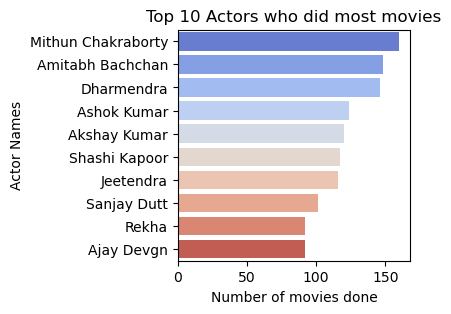

In [89]:
plt.figure(figsize=(3,3))
sns.barplot(x=actor_counts.values,y=actor_counts.index,palette="coolwarm")
plt.title("Top 10 Actors who did most movies")
plt.xlabel("Number of movies done")
plt.ylabel("Actor Names")
plt.show()

##### Correlation Analysis

We will check the relationship between numeric features

In [97]:
df.dtypes

Year          int32
Duration      int64
Genre        object
Rating      float64
Votes         int64
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

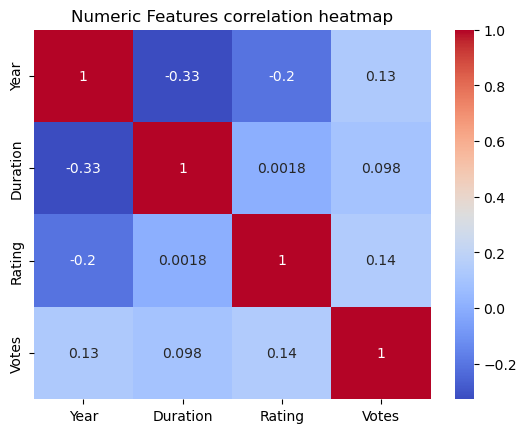

In [103]:
corr_df=df.drop(columns=["Actor 1","Actor 2","Actor 3","Genre","Director"])
corr_matrix=corr_df.corr()
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")
plt.title("Numeric Features correlation heatmap")
plt.show()

Analysis of features against Rating

<Figure size 200x200 with 0 Axes>

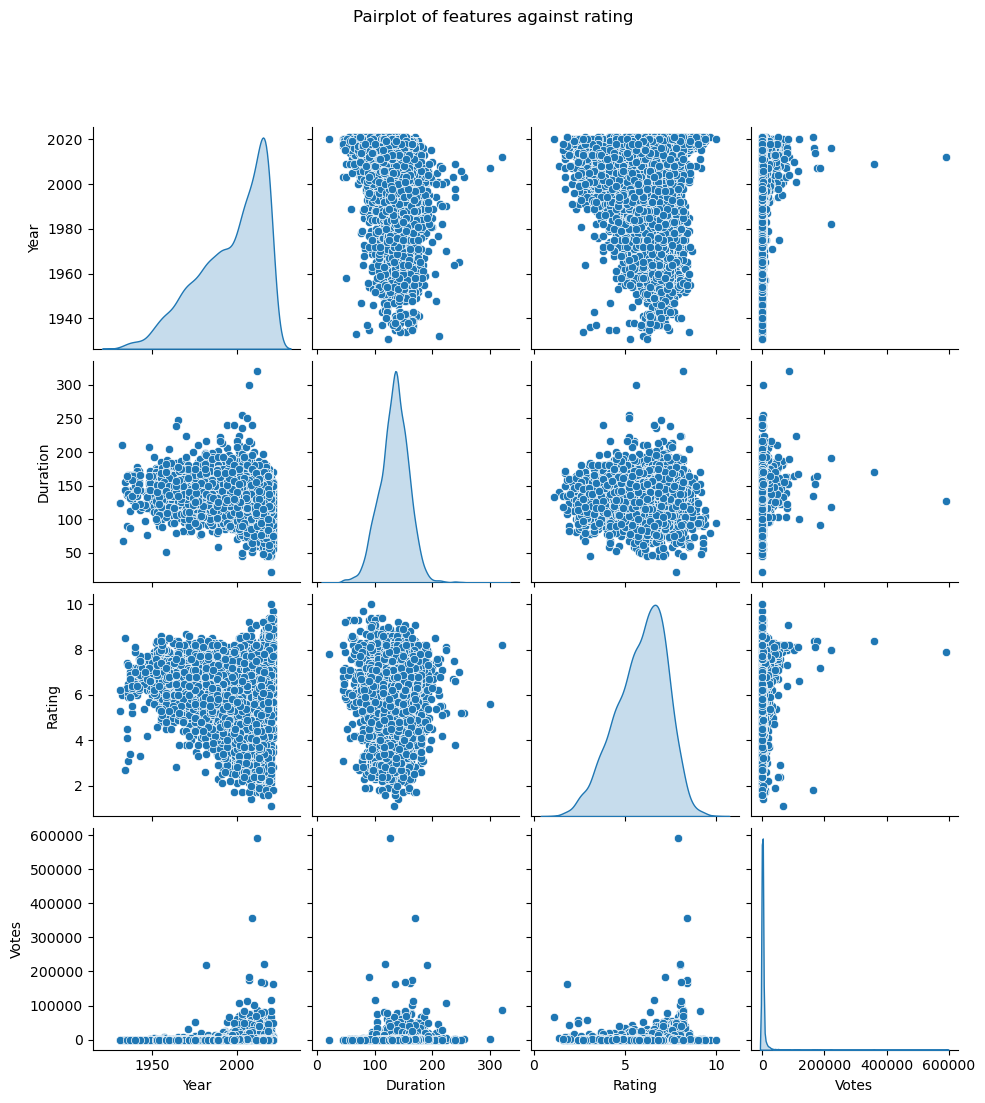

In [118]:
plt.figure(figsize=(2,2))
sns.pairplot(corr_df,diag_kind="kde")
plt.suptitle("Pairplot of features against rating",y=1.1)
plt.show()

### Feature Engineering

In [123]:
df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
3,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
4,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


we will add new features

In [130]:
df.select_dtypes(include="object").columns

Index(['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], dtype='object')

In [126]:
df.Genre.value_counts()

Genre
Drama                              844
Drama, Romance                     332
Action, Crime, Drama               329
Action, Drama                      206
Comedy, Drama                      205
                                  ... 
Comedy, Crime, Musical               1
History, Romance                     1
Drama, History, Sport                1
Animation, Comedy, Drama             1
Documentary, Biography, Musical      1
Name: count, Length: 376, dtype: int64

In [132]:
Genre_avg_rating=df.groupby("Genre")["Rating"].transform("mean")
df["Genre_avg_rating"]=Genre_avg_rating

Director_avg_rating=df.groupby("Director")["Rating"].transform("mean")
df["Director_avg_rating"]=Director_avg_rating

Actor1_avg_rating=df.groupby("Actor 1")["Rating"].transform("mean")
df["Actor1_avg_rating"]=Actor1_avg_rating

Actor2_avg_rating=df.groupby("Actor 2")["Rating"].transform("mean")
df["Actor2_avg_rating"]=Actor2_avg_rating

Actor3_avg_rating=df.groupby("Actor 3")["Rating"].transform("mean")
df["Actor3_avg_rating"]=Actor3_avg_rating

In [134]:
df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_avg_rating,Director_avg_rating,Actor1_avg_rating,Actor2_avg_rating,Actor3_avg_rating
0,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.415521,7.000000,6.850000,7.000000,7.000000
1,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.716822,4.400000,5.420000,4.400000,4.450000
2,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,6.242222,5.313333,4.788889,5.786667,5.872727
3,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,6.820000,7.383333,5.435000,6.933333,6.500000
4,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,5.477778,5.600000,5.600000,5.883333,5.600000


### Sampling

In [138]:
df.columns

Index(['Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1',
       'Actor 2', 'Actor 3', 'Genre_avg_rating', 'Director_avg_rating',
       'Actor1_avg_rating', 'Actor2_avg_rating', 'Actor3_avg_rating'],
      dtype='object')

In [148]:
df2=df[['Year','Duration','Votes','Genre_avg_rating', 'Director_avg_rating',
        'Actor1_avg_rating', 'Actor2_avg_rating', 'Actor3_avg_rating',"Rating"]]

In [150]:
df2.head()

,Year,Duration,Votes,Genre_avg_rating,Director_avg_rating,Actor1_avg_rating,Actor2_avg_rating,Actor3_avg_rating,Rating
0,2019,109,8,6.415521,7.000000,6.850000,7.000000,7.000000,7.0
1,2019,110,35,5.716822,4.400000,5.420000,4.400000,4.450000,4.4
2,1997,147,827,6.242222,5.313333,4.788889,5.786667,5.872727,4.7
3,2005,142,1086,6.820000,7.383333,5.435000,6.933333,6.500000,7.4
4,2012,82,326,5.477778,5.600000,5.600000,5.883333,5.600000,5.6


In [154]:
df2.shape

(5659, 9)

In [146]:
from sklearn.model_selection import train_test_split
df2_train,df2_test=train_test_split(df2,test_size=.2,random_state=200)

In [156]:
df2_train_x=df2.iloc[:,:-1]
df2_train_y=df2["Rating"]
df2_test_x=df2.iloc[:,:-1]
df2_test_y=df2["Rating"]

In [158]:
df2_train_x

,Year,Duration,Votes,Genre_avg_rating,Director_avg_rating,Actor1_avg_rating,Actor2_avg_rating,Actor3_avg_rating
0,2019,109,8,6.415521,7.000000,6.850000,7.000000,7.000000
1,2019,110,35,5.716822,4.400000,5.420000,4.400000,4.450000
2,1997,147,827,6.242222,5.313333,4.788889,5.786667,5.872727
3,2005,142,1086,6.820000,7.383333,5.435000,6.933333,6.500000
4,2012,82,326,5.477778,5.600000,5.600000,5.883333,5.600000
...,...,...,...,...,...,...,...,...
5654,2015,115,408,6.415521,6.100000,6.725000,6.100000,5.850000
5655,2001,153,1496,6.950000,7.250000,4.157143,5.823077,5.954545
5656,1989,125,44,5.743465,6.270000,6.307692,5.800000,6.050000
5657,1999,129,655,5.516505,5.225000,5.481707,4.640000,5.737500


In [160]:
df2_train_y

0       7.0
1       4.4
2       4.7
3       7.4
4       5.6
       ... 
5654    6.1
5655    6.2
5656    5.8
5657    4.5
5658    6.2
Name: Rating, Length: 5659, dtype: float64

In [162]:
df2_test_x

,Year,Duration,Votes,Genre_avg_rating,Director_avg_rating,Actor1_avg_rating,Actor2_avg_rating,Actor3_avg_rating
0,2019,109,8,6.415521,7.000000,6.850000,7.000000,7.000000
1,2019,110,35,5.716822,4.400000,5.420000,4.400000,4.450000
2,1997,147,827,6.242222,5.313333,4.788889,5.786667,5.872727
3,2005,142,1086,6.820000,7.383333,5.435000,6.933333,6.500000
4,2012,82,326,5.477778,5.600000,5.600000,5.883333,5.600000
...,...,...,...,...,...,...,...,...
5654,2015,115,408,6.415521,6.100000,6.725000,6.100000,5.850000
5655,2001,153,1496,6.950000,7.250000,4.157143,5.823077,5.954545
5656,1989,125,44,5.743465,6.270000,6.307692,5.800000,6.050000
5657,1999,129,655,5.516505,5.225000,5.481707,4.640000,5.737500


In [164]:
df2_test_y

0       7.0
1       4.4
2       4.7
3       7.4
4       5.6
       ... 
5654    6.1
5655    6.2
5656    5.8
5657    4.5
5658    6.2
Name: Rating, Length: 5659, dtype: float64

### Model Building

In [166]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(df2_train_x,df2_train_y)

LinearRegression()

In [168]:
pred_lin=linreg.predict(df2_test_x)
pred_lin

array([7.23905408, 4.20895981, 5.44116973, ..., 6.10569741, 5.06046474,
       5.04944391])

### Evaluating the model performance

In [170]:
R_square=linreg.score(df2_train_x,df2_train_y)
R_square

0.7840390209741722

In [172]:
linreg.intercept_

-3.618963149070934

In [174]:
err_train=df2_train_y-pred_lin
err_train

0      -0.239054
1       0.191040
2      -0.741170
3       0.372787
4       0.158204
          ...   
5654   -0.124127
5655   -0.047267
5656   -0.305697
5657   -0.560465
5658    1.150556
Name: Rating, Length: 5659, dtype: float64

In [232]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,r2_score,root_mean_squared_error

In [234]:
mse=mean_squared_error(df2_test_y,pred_lin)
rmse=root_mean_squared_error(df2_test_y,pred_lin)
mape=mean_absolute_percentage_error(df2_test_y,pred_lin)
r2score=r2_score(df2_test_y,pred_lin)
print("mse=",mse)
print("mape=",mape)
print("r2score",r2score)
print("rmse=",rmse)

mse= 0.4118980677720514
mape= 0.09290765853638273
r2score 0.7840390209741722
rmse= 0.6417928542544327


### ACTUAL V/S PREDICTED ANALYSIS

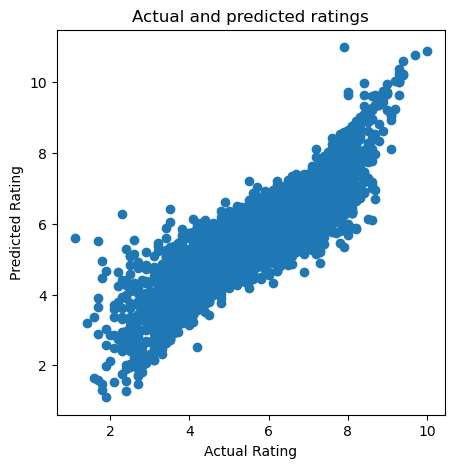

In [197]:
plt.figure(figsize=(5,5))
plt.scatter(df2_test_y,pred_lin)
plt.title("Actual and predicted ratings")
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.show()

(array([1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        3.000e+00, 2.000e+00, 6.000e+00, 8.000e+00, 1.100e+01, 2.900e+01,
        5.900e+01, 7.600e+01, 1.400e+02, 2.390e+02, 4.180e+02, 7.320e+02,
        9.740e+02, 1.013e+03, 7.810e+02, 4.770e+02, 2.910e+02, 1.660e+02,
        1.120e+02, 6.800e+01, 2.800e+01, 1.000e+01, 5.000e+00, 6.000e+00]),
 array([-4.50087942, -4.26535563, -4.02983184, -3.79430805, -3.55878426,
        -3.32326047, -3.08773668, -2.85221289, -2.6166891 , -2.38116531,
        -2.14564152, -1.91011773, -1.67459394, -1.43907015, -1.20354637,
        -0.96802258, -0.73249879, -0.496975  , -0.26145121, -0.02592742,
         0.20959637,  0.44512016,  0.68064395,  0.91616774,  1.15169153,
         1.38721532,  1.62273911,  1.8582629 ,  2.09378669,  2.32931048,
         2.56483427]),
 <BarContainer object of 30 artists>)

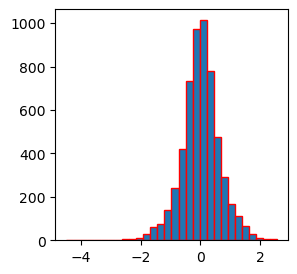

In [208]:
plt.figure(figsize=(3,3))
plt.hist(err_train,bins=30,edgecolor="red")

<Axes: ylabel='Rating'>

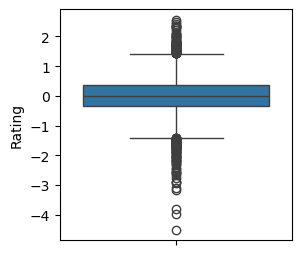

In [206]:
plt.figure(figsize=(3,3))
sns.boxplot(err_train)

In [224]:
actual_pred=pd.DataFrame()
actual_pred["Actual"]=df2_train_y
actual_pred["Predicted"]=pred_lin

In [226]:
actual_pred

,Actual,Predicted
0,7.0,7.239054
1,4.4,4.208960
2,4.7,5.441170
3,7.4,7.027213
4,5.6,5.441796
...,...,...
5654,6.1,6.224127
5655,6.2,6.247267
5656,5.8,6.105697
5657,4.5,5.060465


<Axes: xlabel='Actual', ylabel='Predicted'>

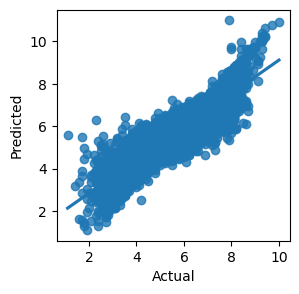

In [230]:
plt.figure(figsize=(3,3))
sns.regplot(x="Actual",y="Predicted",data=actual_pred)

### Conclusion

1. Mse of 0.41 means squared error in our predictions is 0.41 ratings units squared.
2. Mape of 9.29% means percentage of errors between actual and predicted is 9.28% which is not bad.
3. Lower the MAPE accurate is the model. less than 10% is a good number.
4. Rsquare of 78% means model explains 78% of the variability in the dependant variable by the independant variable.
5. Outliers are observed in the data.
6. Checked the difference in Actual vs Predicted values.
7. Model is able to predict close Rating.